In [ ]:
#!/bin/bash
! kaggle datasets download jeevannagaraj/indian-liver-patient-dataset
! unzip indian-liver-patient-dataset

Dataset URL: https://www.kaggle.com/datasets/jeevannagaraj/indian-liver-patient-dataset
License(s): DbCL-1.0
  0% 0.00/7.65k [00:00<?, ?B/s]
100% 7.65k/7.65k [00:00<00:00, 11.3MB/s]
Archive:  indian-liver-patient-dataset.zip
  inflating: Indian Liver Patient Dataset (ILPD).csv  


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# read and loading the dataset
liver_data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv')
print(liver_data.head())

   age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65  Female            0.7               0.1           187       16   
1   62    Male           10.9               5.5           699       64   
2   62    Male            7.3               4.1           490       60   
3   58    Male            1.0               0.4           182       14   
4   72    Male            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1  


# Data Cleaning

In [ ]:
liver_data.isnull().sum()

,0
age,0
gender,0
tot_bilirubin,0
direct_bilirubin,0
tot_proteins,0
albumin,0
ag_ratio,0
sgpt,0
sgot,0
alkphos,4


In [ ]:
liver_data['alkphos'] = liver_data['alkphos'].fillna(liver_data['alkphos'].mean())
liver_data.isnull().sum()

,0
age,0
gender,0
tot_bilirubin,0
direct_bilirubin,0
tot_proteins,0
albumin,0
ag_ratio,0
sgpt,0
sgot,0
alkphos,0


# Normalization

In [ ]:
scaler = MinMaxScaler()

# numerical columns for normalization
numerical_columns = ['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
                     'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos']
liver_data[numerical_columns] = scaler.fit_transform(liver_data[numerical_columns])

liver_data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,0.709302,Female,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,Male,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,Male,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,Male,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,Male,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1


In [ ]:
# converting gender column to numeric
liver_data['gender'] = liver_data['gender'].map({'Male': 1, 'Female': 0})

liver_data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1


# Discretization

In [ ]:
# age into categories
age_bins = [0, 30, 50, 100]
age_labels = ['Young', 'Middle-aged', 'Old']
liver_data['age_binned'] = pd.cut(liver_data['age'], bins=age_bins, labels=age_labels)

# Bilirubin categories (Low, Medium, High)
bilirubin_bins = [0, 1, 5, 10]
bilirubin_labels = ['Low', 'Medium', 'High']
liver_data['tot_bilirubin_binned'] = pd.cut(liver_data['tot_bilirubin'], bins=bilirubin_bins, labels=bilirubin_labels)

liver_data[['age', 'age_binned', 'tot_bilirubin', 'tot_bilirubin_binned']].head()

,age,age_binned,tot_bilirubin,tot_bilirubin_binned
0,0.709302,Young,0.004021,Low
1,0.674419,Young,0.140751,Low
2,0.674419,Young,0.092493,Low
3,0.627907,Young,0.008043,Low
4,0.790698,Young,0.046917,Low


#Similarity

In [ ]:
# Compute similarity between two records using cosine similarity
features = liver_data[numerical_columns]
similarity_matrix = cosine_similarity(features)

similarity_matrix[0, 1]

0.9365654666706316

# Visualization

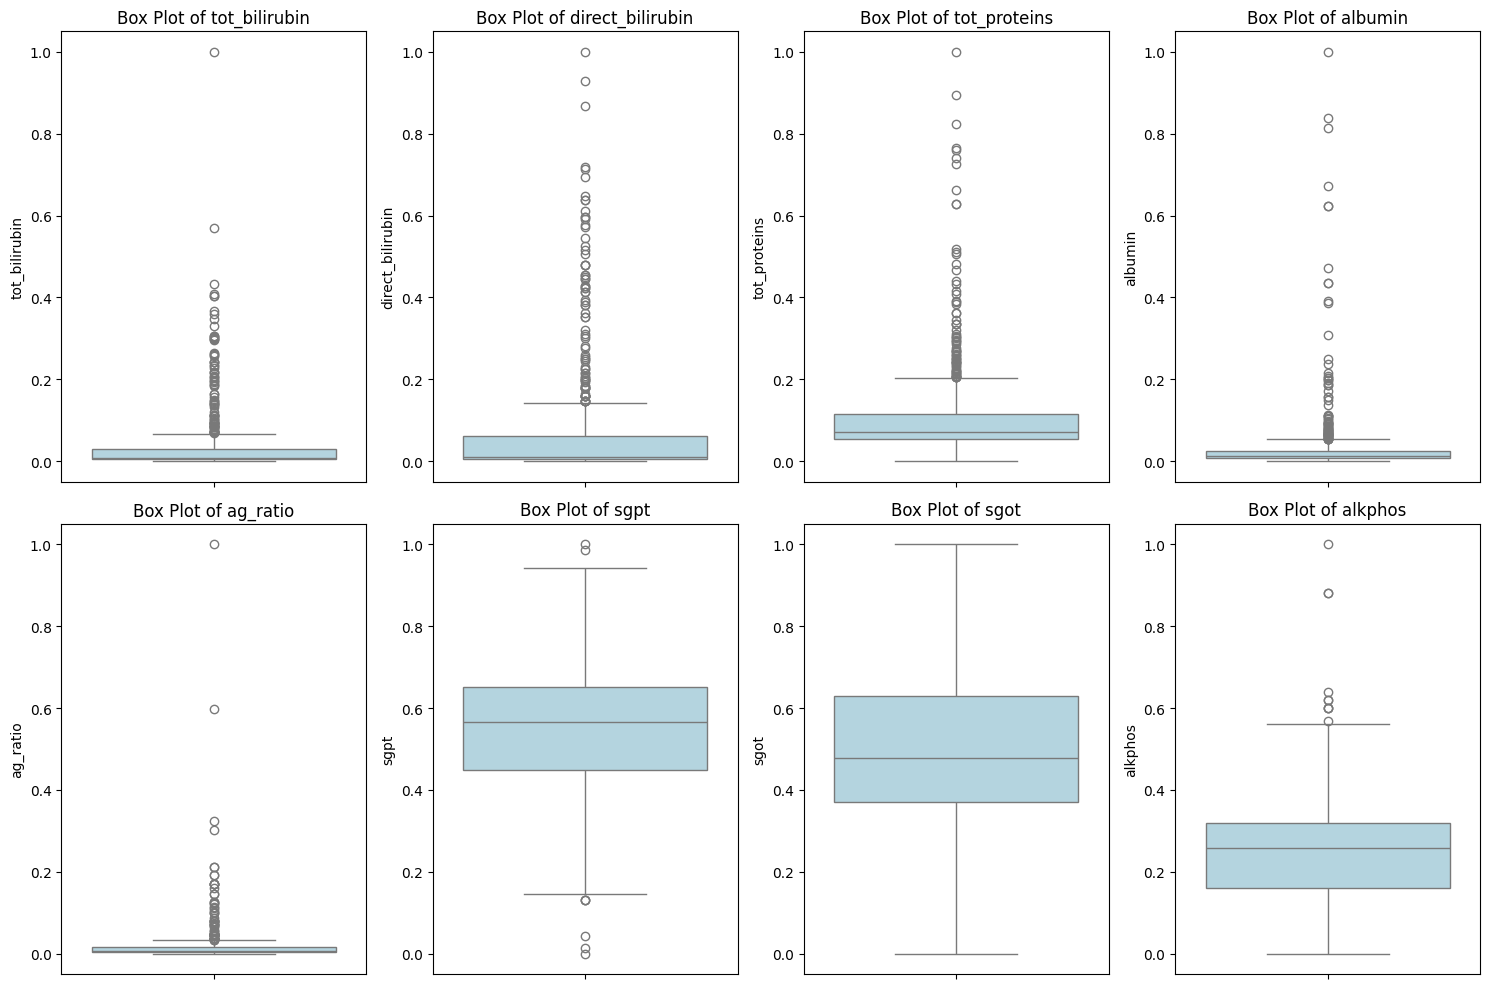

In [ ]:
clinical_features = ['tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos']

# box plots for each clinical feature to visualize their distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(clinical_features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=liver_data[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Displays the distribution, median, and outliers of clinical features, helps to identify variability and anamolity in features like tot_bilirubin, sgpt, and albumin.

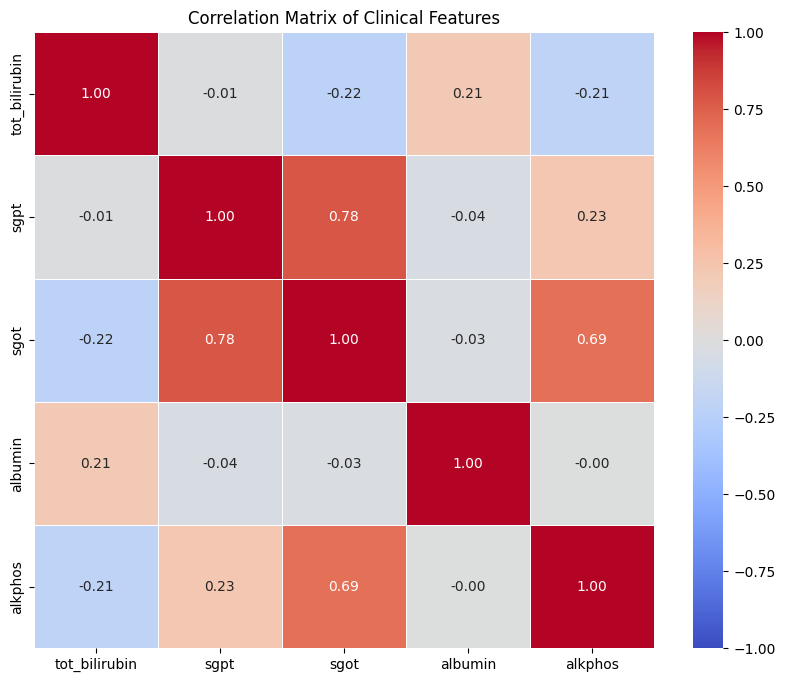

In [ ]:
# correlation matrix for numerical features
correlation_matrix = liver_data[clinical_features].corr()

# heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Clinical Features')
plt.show()

Visualizes the strength of relationships between clinical features, highlighting which features are positively or negatively correlated.

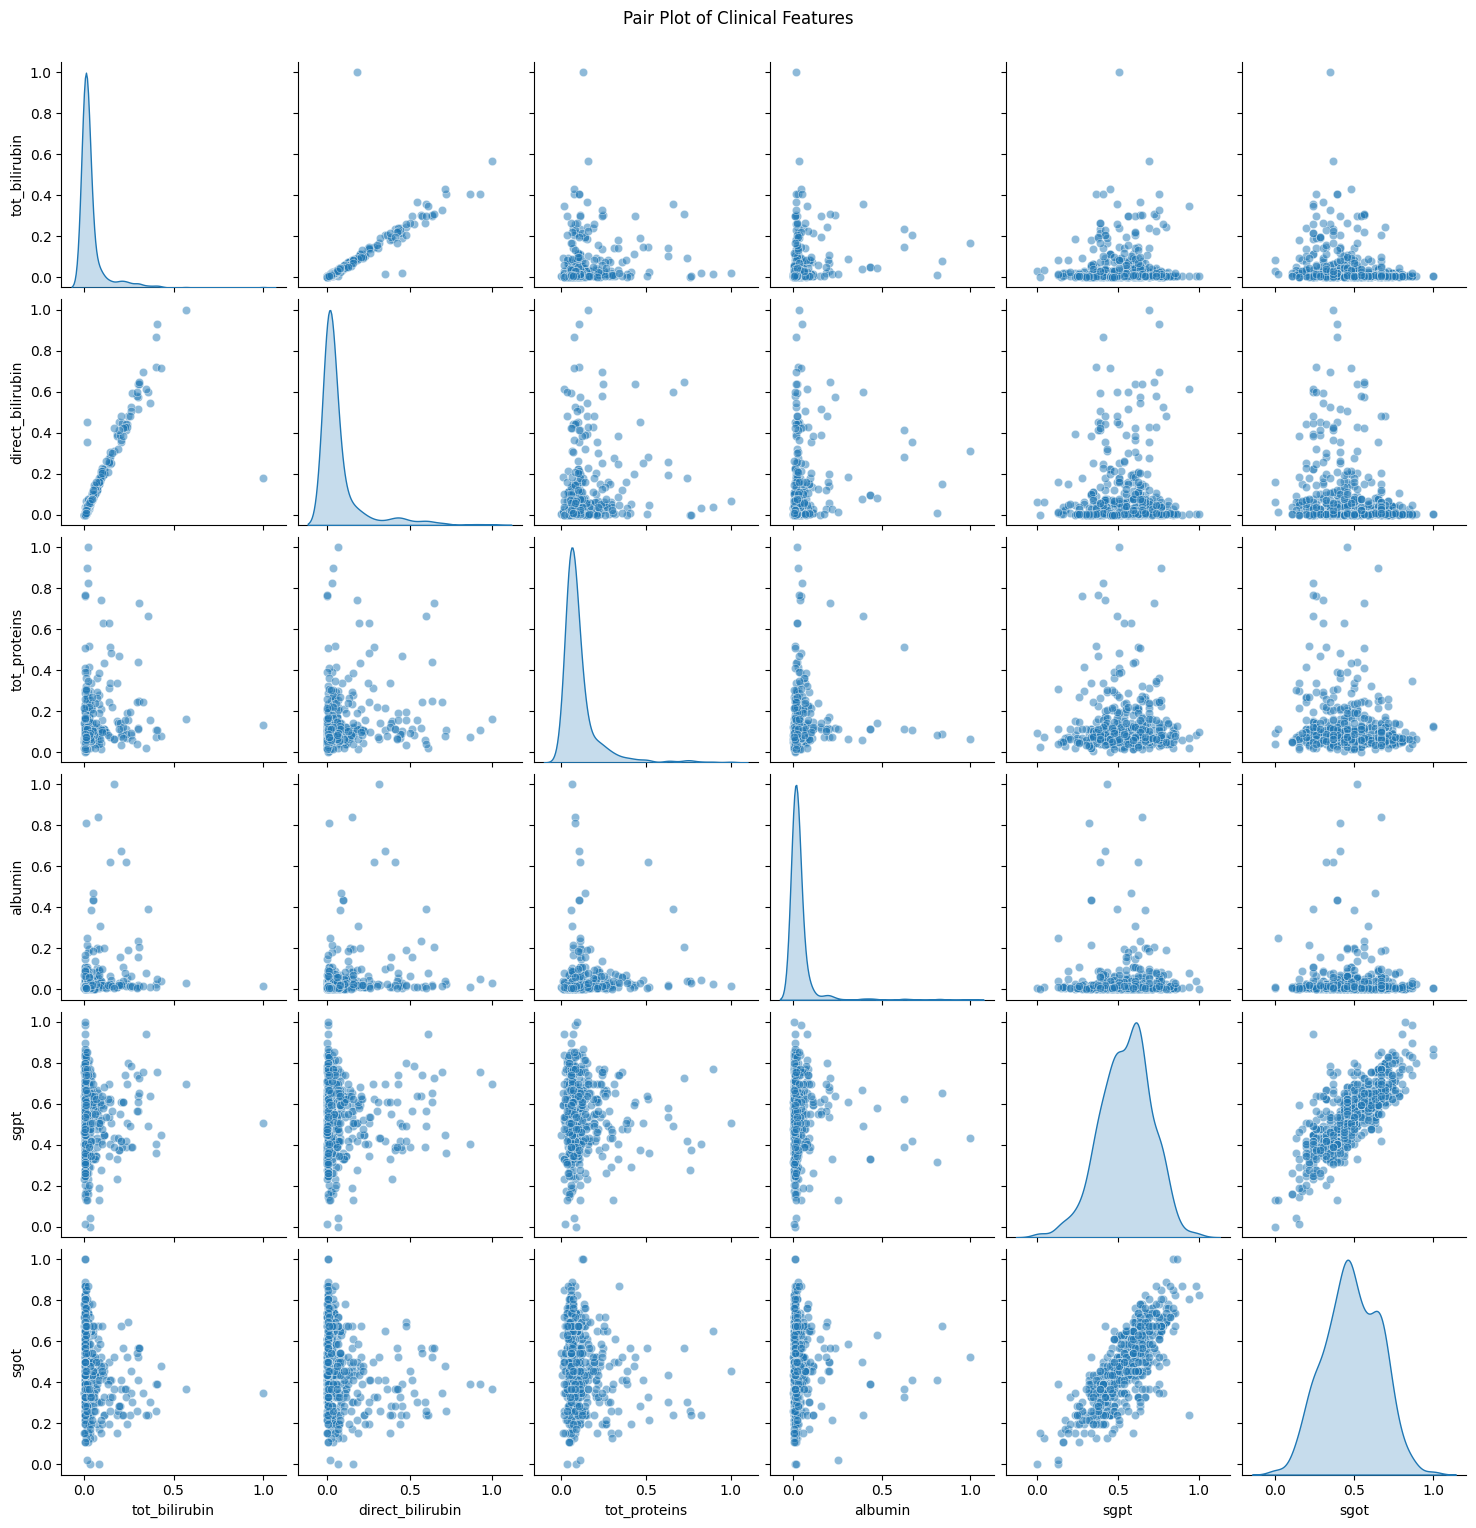

In [ ]:
# columns for the pair plot
pair_features = ['tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin', 'sgpt', 'sgot']

# pairplot to visualize relationships between multiple features
sns.pairplot(liver_data[pair_features], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Clinical Features', y=1.02)
plt.show()

Provides scatter plots of pairs of clinical features, allowing us to observe potential linear or nonlinear relationships between multiple features.

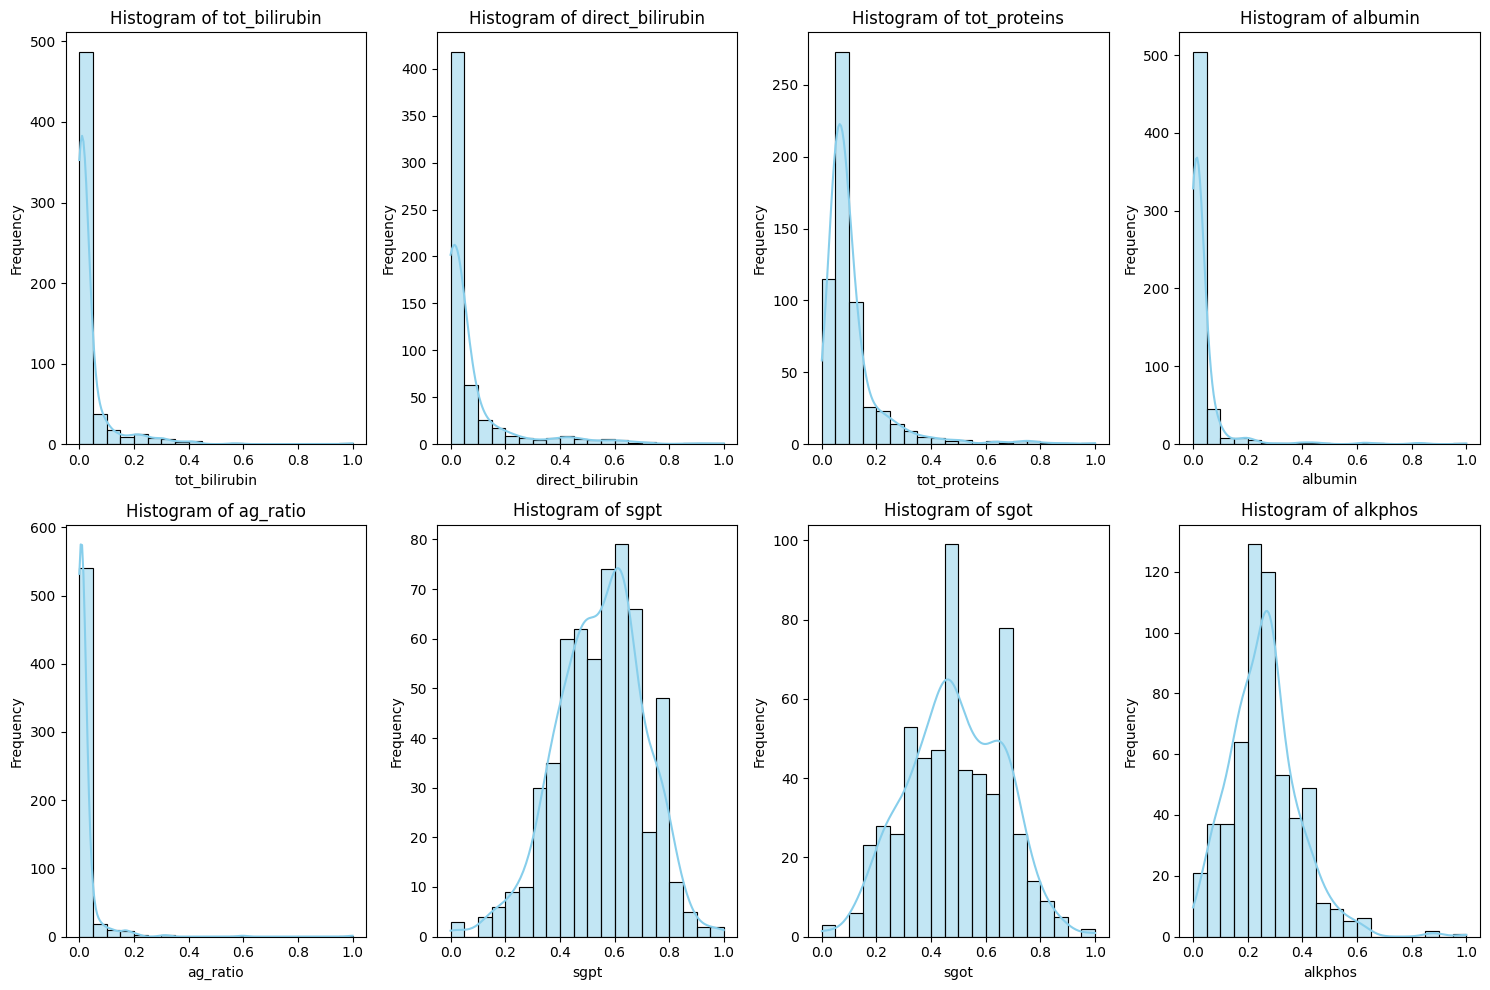

In [ ]:
# Plot histograms for each clinical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(clinical_features):
    plt.subplot(2, 4, i+1)
    sns.histplot(liver_data[feature], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Show the frequency distribution of individual clinical features, revealing how values are spread and whether any features are skewed.


# Conclusion

In this mini project, we used various visualizations techniques to explore the clinical features present in the dataset. By looking at box plots, histograms, and correlation heatmaps, we were able to see how the values of different features, such as `tot_bilirubin`, `sgpt`, and `albumin`, how they relate to each other. These visualizations helped us identify patterns in the data and better understand the relationships between the features, providing insights that could be useful for further analysis.